
## Software cost estimation (Final Year Project)
Module - 2
Client - Santosh Kumar
Country Pak



In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
df_fp = pd.read_excel(r"C:\Users\user\Downloads\fp (1).xlsx", delim_whitespace = True,
names=['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions','Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust','Language']
)
df_fp.dataframeName = 'fp.xlsx'
labels = list('AB')
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [2]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

costLeng = [df_fp.Effort,df_fp.Language]
np.cov(costLeng)

array([[ 1.95255038e+07, -8.18448611e+02],
       [-8.18448611e+02,  5.00000000e-01]])

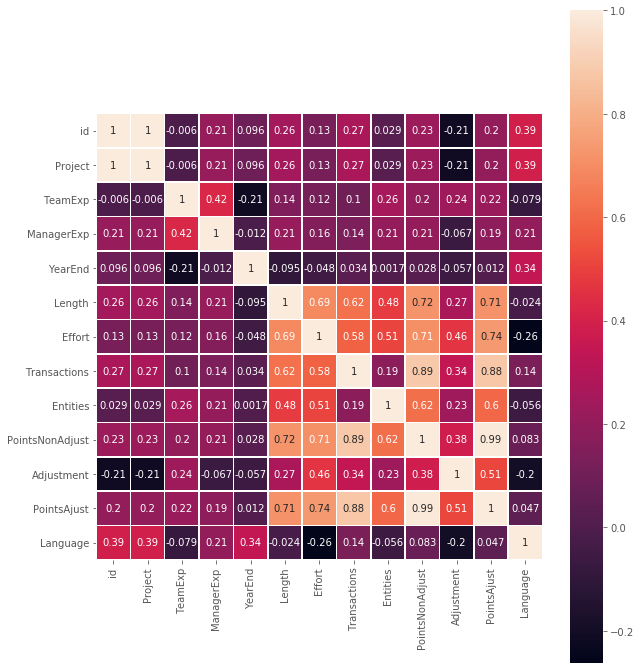

In [3]:
plt.figure(figsize=(10, 12))
sns.heatmap(df_fp.corr(),square=True, annot=True, linewidths=.5)

Y Correlation

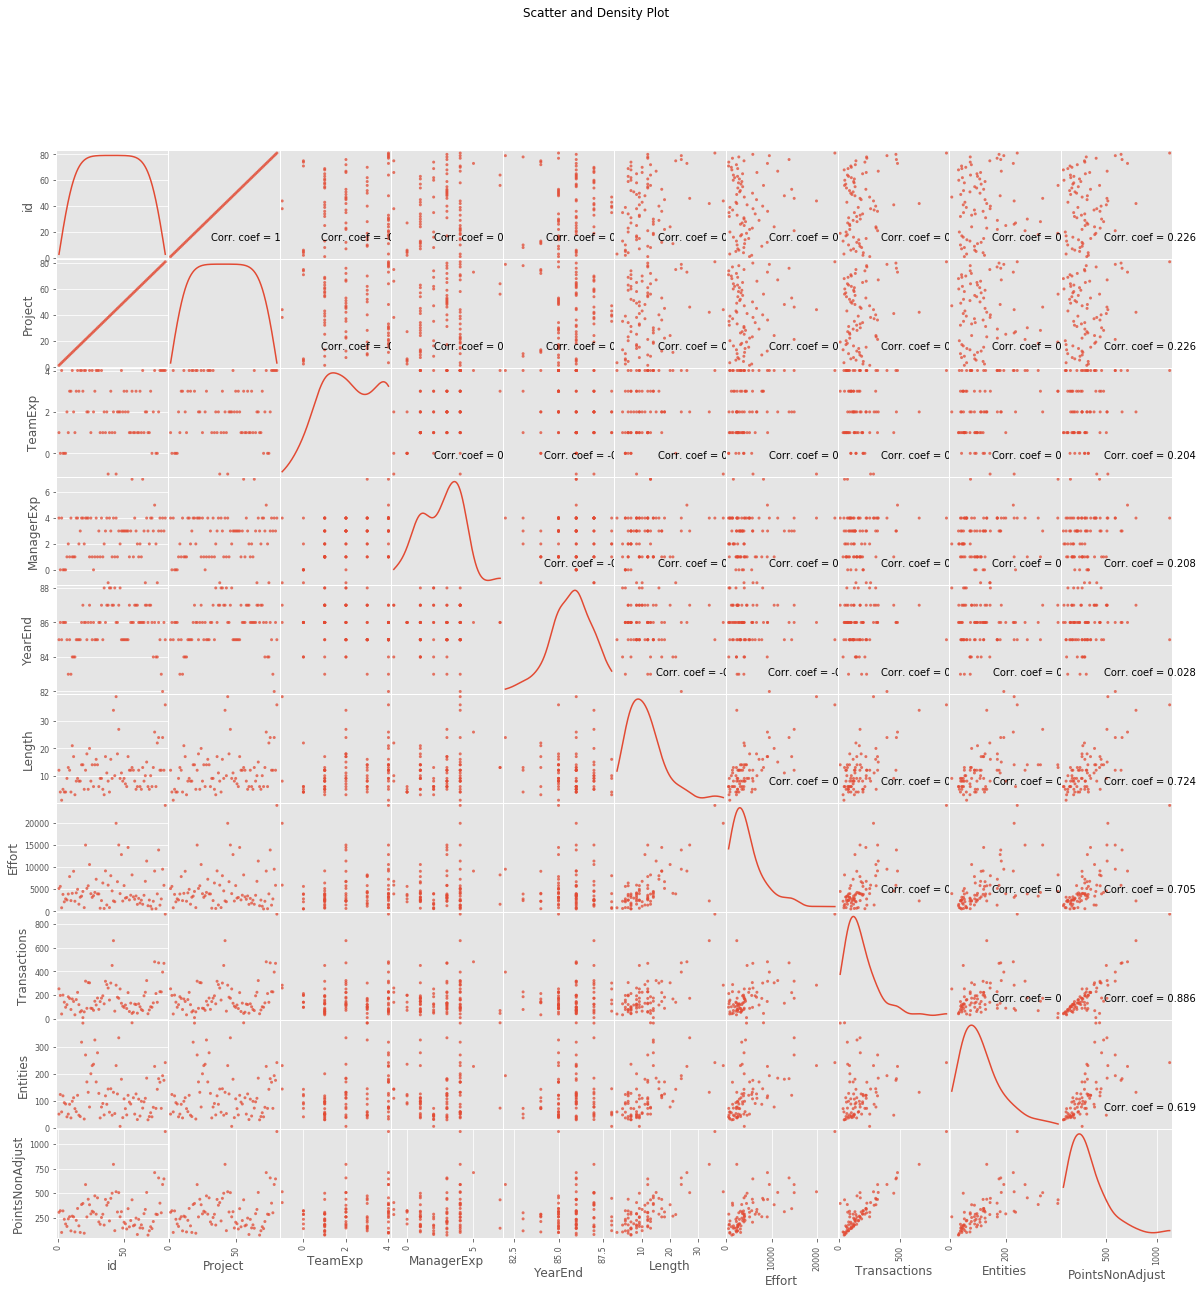

In [4]:
    plotScatterMatrix(df_fp, 20, 10)

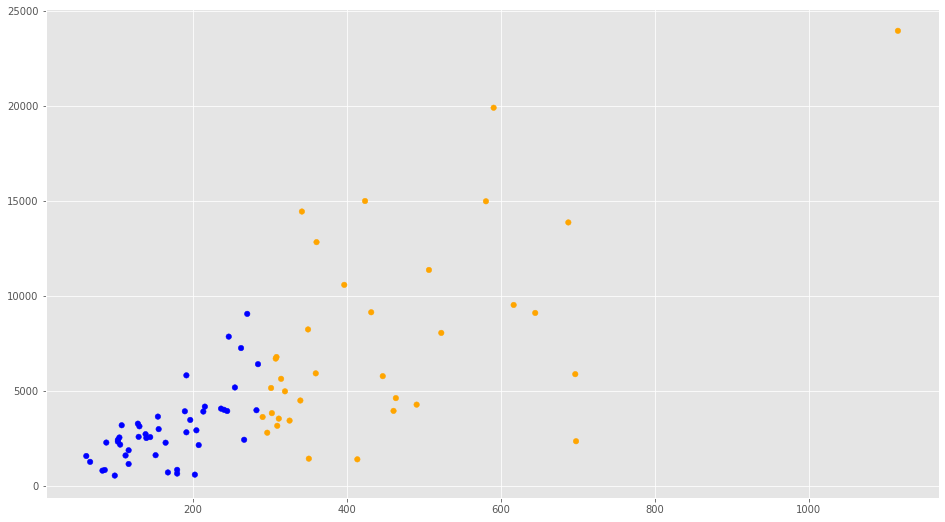

In [5]:
filtered_data = df_fp[(df_fp['PointsAjust'] <= max(df_fp.PointsAjust)) & (df_fp['Effort'] <= max(df_fp.Effort))]
colores=['orange','blue']
tamanios=[30,60]
f1 = filtered_data['PointsAjust'].values
f2 = filtered_data['Effort'].values
# Vamos a pintar en colores los puntos por debajo y por encima de la media de los puntos de función
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['PointsAjust']> f1.mean()):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

## Model Regression

In [6]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["PointsAjust"]]
X_train = np.array(dataX)
y_train = filtered_data['Effort'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones,  una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino independiente: \n', regr.intercept_)
# Error Cuadrado Medio
print("Error cuadratico medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Varianza: %.2f' % r2_score(y_train, y_pred))

Coeficientes: 
 [17.56151894]
Termino independiente: 
 -33.08970136642256
Error cuadratico medio: 8773579.47
Varianza: 0.55


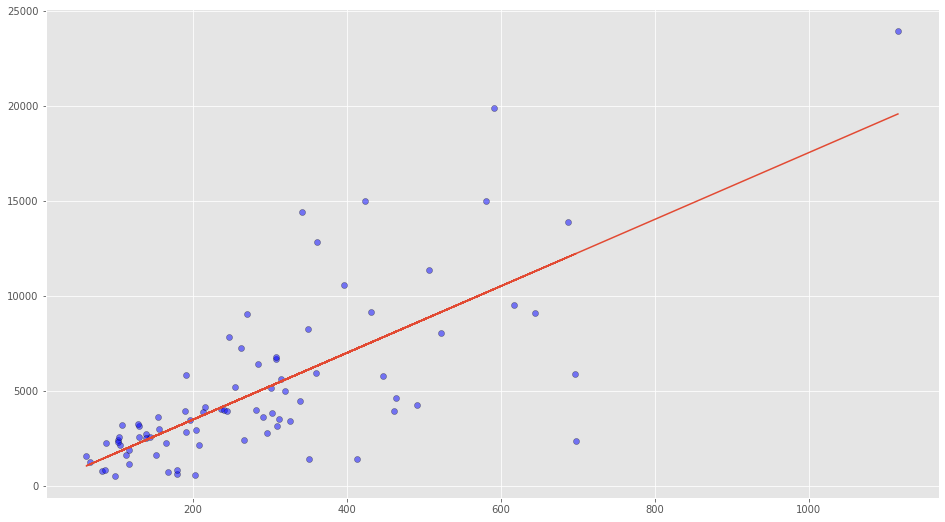

In [7]:
dataX =filtered_data[["PointsAjust"]]
X_train = np.array(dataX)
y_train = filtered_data['Effort'].values
b=-33.08970136642529
m= 17.56151894 
plt.scatter(dataX, y_train , c='blue', edgecolors=(0, 0, 0), alpha=0.5)
plt.plot(X_train, [b + m * x for x in X_train])
plt.show()


Prdiction on Linear Regression


In [8]:
y_Effort = regr.predict([[150]])
print(int(y_Effort)) 

2601


##Regression Multiple Values

In [9]:

suma = (filtered_data["TeamExp"] + filtered_data['ManagerExp'])
dataX2 =  pd.DataFrame()
dataX2["Length"] = filtered_data["Length"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['Effort'].values

#Creamos un nuevo objeto de Regresión lineal  que  tendrá  dos dimensiones
#para  entrenar: las que contiene XY_train

regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coeficientes: \n', regr2.coef_)
# Error cuadrático medio
print("Error cuadratico medio: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos la varianza (siendo 1.0 el mejor posible)
print('Varaianza: %.2f' % r2_score(z_train, z_pred))

Coeficientes: 
 [410.17267631  32.78563384]
Error cuadratico medio: 10008844.87
Varaianza: 0.48


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

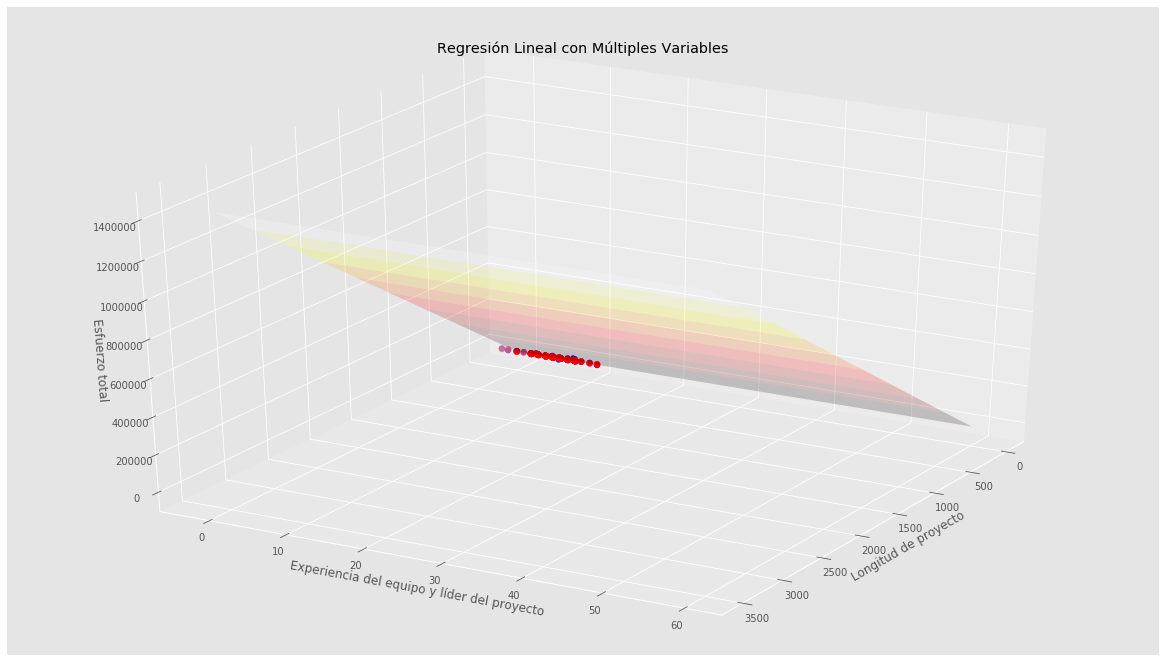

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
z = (nuevoX + nuevoY + regr2.intercept_)
 
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
ax.view_init(elev=30., azim= 30)

ax.set_xlabel('Longitud de proyecto')
ax.set_ylabel('Experiencia del equipo y líder del proyecto')
ax.set_zlabel('Esfuerzo total')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [11]:
 

print('Prediccion: \n')
z_Effort= regr2.predict([[6, 2+10]])
print(int(z_Effort))


Prediccion: 

2960
